<a href="https://colab.research.google.com/github/GabrielMalinowski/ML_Dataworkshops/blob/master/2_ML_dzie%C5%84_5_keras_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 23:18:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  99.5MB/s    in 0.7s    

2019-04-12 23:18:38 (99.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall()
zip_.close()

In [0]:
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(base_dir, 'cats')
validation_dogs_dir = os.path.join(base_dir, 'dogs')

In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir( item_dir )
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]

  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
  plt.tight_layout()

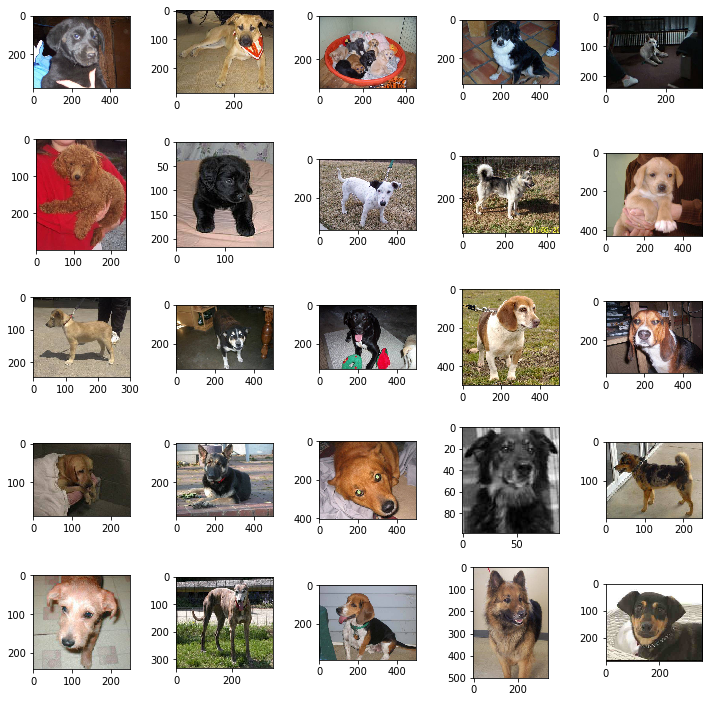

In [0]:
plot_images(train_dogs_dir)

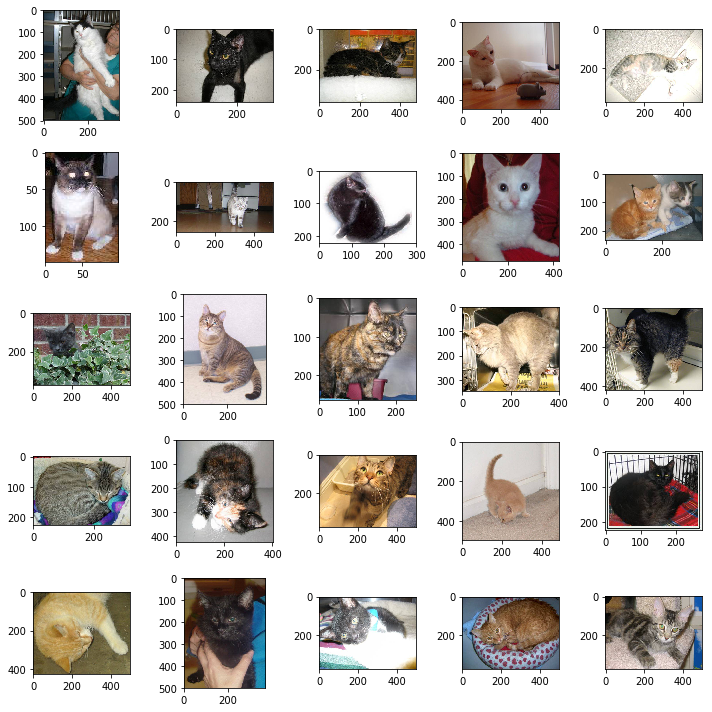

In [0]:
plot_images(train_cats_dir)

In [0]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50/50 [==============================] - 17s 348ms/step - loss: 0.6834 - acc: 0.5470
 - 116s - loss: 0.7003 - acc: 0.5220 - val_loss: 0.6834 - val_acc: 0.5470
Epoch 2/5
50/50 [==============================] - 17s 345ms/step - loss: 0.6755 - acc: 0.6110
 - 115s - loss: 0.6823 - acc: 0.5595 - val_loss: 0.6755 - val_acc: 0.6110
Epoch 3/5
50/50 [==============================] - 17s 344ms/step - loss: 0.6577 - acc: 0.5730
 - 113s - loss: 0.6627 - acc: 0.5920 - val_loss: 0.6577 - val_acc: 0.5730
Epoch 4/5
50/50 [==============================] - 17s 345ms/step - loss: 0.6211 - acc: 0.6500
 - 114s - loss: 0.6366 - acc: 0.6280 - val_loss: 0.6211 - val_acc: 0.6500
Epoch 5/5
50/50 [==============================] - 17s 348ms/step - loss: 0.5892 - acc: 0.6790
 - 114s - loss: 0.6056 - acc: 0.6605 - val_loss: 0.5892 - val_acc: 0.6790
